In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [2]:
Data = np.genfromtxt("Datos_transistor.csv", names=['#V_c','I_c','n'], dtype=float,delimiter=',')
DatosVC = Data['V_c'].tolist()
DatosIC = Data['I_c'].tolist()
numDatos =  Data['n'].tolist()
nv = [numDatos[0] ]
l=0
for i in range(len(numDatos)):
    if nv[-1]!=numDatos[i]:
        nv.append(numDatos[i]) 
nv.append(26)
Datos_VCE_1 = DatosVC[0:int(nv[0])]
Datos_IC_1  = DatosIC[0:int(nv[0])]

Datos_VCE_2 = DatosVC[int(nv[0]):int(nv[0]+nv[1])]
Datos_IC_2  = DatosIC[int(nv[0]):int(nv[0]+nv[1])]

#Tanda 3 I_b = 0.03
Datos_VCE_3 = [0.04,0.07,0.10,0.13,0.18,0.31,0.80,1.30,1.78,2.58,3.56,5.95,8.89,9.85,10.91,13.08,15.25,16.30,17.18]
Datos_IC_3 = np.array([0.811,2.03,3.78,5.57,7.71,9.22,9.80,9.89,10.01,10.20,10.51,11.02,11.68,12.10,12.44,13.19,13.81,14.23,14.50])/1000

#Tanda 4 I_b = 0.04
Datos_VCE_4 =[0.07,0.09,0.15,0.20,0.28,0.37,0.53,0.82,1.04,1.54,1.91,2.14,2.60,3.21,4.08,5.24,6.69,7.50,10.30,12.41,13.75,15.21,17.13,18.41]
Datos_IC_4 = np.array([2.16,4.11,7.99,10.18,11.27,11.91,12.69,12.92,13.06,13.22,13.37,13.36,13.39,13.45,13.63,13.88,14.15,14.34,14.89,15.32,15.64,15.96,16.42,16.74])/1000

Datos_VCE_5 = DatosVC[int(nv[0]+nv[1]):int(nv[0]+nv[1]+nv[2])]
Datos_IC_5  = DatosIC[int(nv[0]+nv[1]):int(nv[0]+nv[1]+nv[2])]

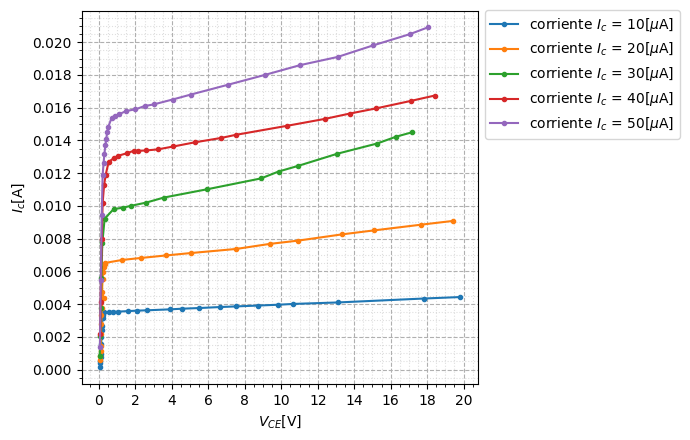

In [4]:
DATOS_V = []
DATOS_V.append(Datos_VCE_1)
DATOS_V.append(Datos_VCE_2)
DATOS_V.append(Datos_VCE_3)
DATOS_V.append(Datos_VCE_4)
DATOS_V.append(Datos_VCE_5)

DATOS_I=[]
DATOS_I.append(Datos_IC_1)
DATOS_I.append(Datos_IC_2)
DATOS_I.append(Datos_IC_3)
DATOS_I.append(Datos_IC_4)
DATOS_I.append(Datos_IC_5)

NV = []
NV.append(int(len(Datos_IC_1)))
NV.append(int(len(Datos_IC_2)))
NV.append(int(len(Datos_IC_3)))
NV.append(int(len(Datos_IC_4)))
NV.append(int(len(Datos_IC_5)))

IC = [10,20,30,40,50]
d  = int(0)

FIG,AX = plt.subplots(figsize=(7,4.5),tight_layout=True)
AX.set_xlabel(r'$V_{CE}$[V]')
AX.set_ylabel(r'$I_c$[A]')
AX.xaxis.set_major_locator(MultipleLocator(2))
AX.yaxis.set_major_locator(MultipleLocator(0.002))
AX.xaxis.set_minor_locator(AutoMinorLocator(4))
AX.yaxis.set_minor_locator(AutoMinorLocator(4))


AX.grid(which='major',axis='both',linestyle='--')
AX.grid(which='minor',axis='both',alpha=0.4,linestyle=':')
AX.grid()
for i in range(5):
    AX.plot(DATOS_V[i],DATOS_I[i],'.-',label=rf'corriente $I_c$ = {IC[i]}[$\mu$A]')
AX.legend(bbox_to_anchor=(1.0,1.02))    
AX.grid() 
FIG.savefig('corrientes.pdf')

In [14]:
def Buscar_5V(x,y):
    x_desplazado = [x-5 for x in x]
    for i in range(1,len(x_desplazado)):
        if x_desplazado[i-1]*x_desplazado[i]<0:
            m = (y[i]-y[i-1])/(x[i]-x[i-1])
            prediccion = -m*(x[i-1])+y[i-1]
    return prediccion
pred = list()
for i in range(5):
    pred.append(Buscar_5V(DATOS_V[i],DATOS_I[i])*1e5)  

print(pred,np.mean(pred),np.std(pred))

[352.0869565217393, 657.8928571428569, 975.0334728033473, 1275.068965517242, 1527.5757575757568] 957.5316019121885 420.1031369021271
